In [66]:
# Imports and defs
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.5f' % x)

def get_extent(hist):
    x_min = hist[1][0]
    x_max = hist[1][-1]
    y_min = hist[2][0]
    y_max = hist[2][-1]
    return [x_min, x_max, y_min, y_max]

def stats():    
    # Plots
    hist = np.load(f'../data/canneal_test/histograms.npz', allow_pickle=True)
    plt.figure(figsize=(15, 10))

    plt.subplot(2,3,1)
    hb = plt.imshow(hist['time_dt'][0].T, cmap='hot', extent=get_extent(hist['time_dt']), aspect='auto')
    plt.colorbar(hb)

    plt.subplot(2,3,2)
    hb = plt.imshow(hist['missn_dtmiss'][0].T, cmap='hot', extent=get_extent(hist['missn_dtmiss']), aspect='auto')
    plt.colorbar(hb)

    plt.subplot(2,3,3)
    hb = plt.imshow(hist['missn_dt'][0].T, cmap='hot', extent=get_extent(hist['missn_dt']), aspect='auto')
    plt.colorbar(hb)

    plt.subplot(2,1,1)
    hb = plt.imshow(hist['miss_hist'][0][np.newaxis,:], cmap='hot', aspect='auto', extent=get_extent(hist['missn_dt']))
    plt.colorbar(hb)

    # Stats CSV
    return pd.read_csv(f'../data/canneal_test/stats.csv', index_col=0)

,access,miss,miss (access delta)
trace len,4217.00000,156.00000,156.00000
unique addr,863.00000,156.00000,156.00000
unique deltas,352.00000,79.00000,77.00000
deltas 50% mass,4.00000,2.00000,2.00000
deltas 50K coverage,1.00000,1.00000,1.00000
rare deltas (< 10),673.00000,80.00000,79.00000
rare deltas fract,0.15959,0.51282,0.50641
unique rare deltas,329.00000,78.00000,76.00000
unique rare deltas fract,0.06991,0.01282,0.01316
unique deltas (no rare),23.00000,1.00000,1.00000


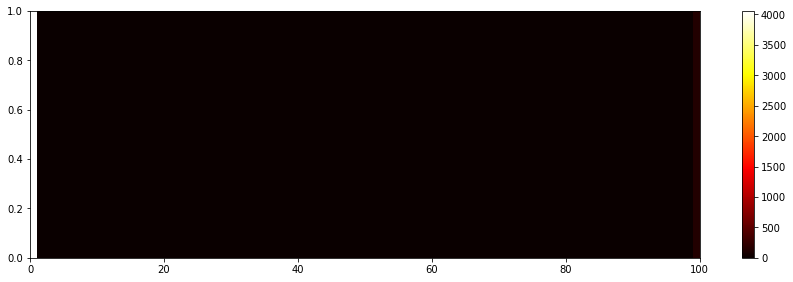

In [67]:
stats()

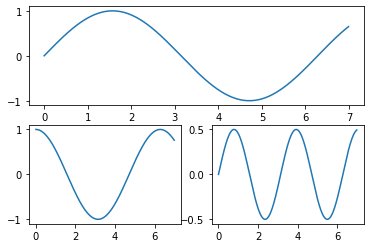

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 7, 0.01)

plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))

plt.subplot(2, 2, 3)
plt.plot(x, np.cos(x))

plt.subplot(2, 2, 4)
plt.plot(x, np.sin(x)*np.cos(x))